In [1]:
import numpy
import scipy
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

In [2]:
ellipse = imageio.imread("/home/brandon/Downloads/ellipse.png")
noise   = imageio.imread("/home/brandon/Downloads/white-noise.jpg")

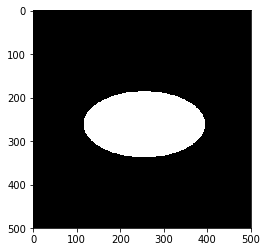

In [3]:
plt.imshow(ellipse)

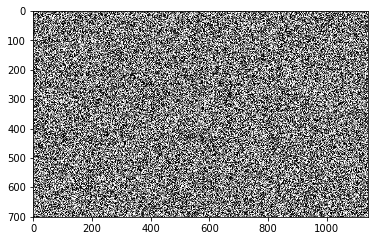

In [4]:
plt.imshow(noise)

In [5]:
from skimage.transform import resize
noise = resize(noise, (500,500))

/home/brandon/.conda/envs/cfd/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


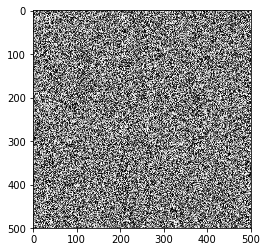

In [6]:
plt.imshow(noise)

In [7]:
#pointwise multiplication of the noize by the mask
A = numpy.multiply(noise, ellipse)
#normalize
A = numpy.divide(A, A.max())

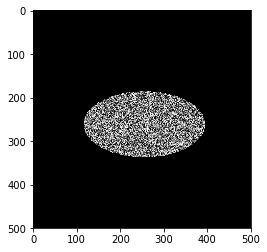

In [8]:
plt.imshow(A, vmin=0, vmax=1000.0)

In [23]:
# Replicate A as phase information, ellipse as frequency information
B = A[:,:] + 1j * A[:,:]

In [24]:
# Take inverse FFT2
C = numpy.fft.ifft2(B, norm="ortho")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15.964932804141153
15.964932804141153
0.0


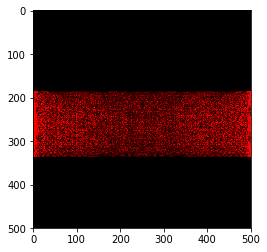

In [25]:
def viewifft2(f):
    fp = abs(f)


    # The following two lines are for the sake of Histogram equalization. This is the dirtiest implementation imaginable. 
    # We use the mean as the maximum value since the max of an fft2 is usually an outlier.
    mx = fp.max()
    mn = fp.min()
    
    print(fp.max())
    print(mx)
    print(mn)
    
    plt.imshow(fp, vmin=mn, vmax=mx)
    
    plt.show()
    
viewifft2(C)

In [ ]:
So white noise within an ellipse does not reproduce fringing